<h2 align=center> Facial Expression Recognition</h2>

### Task 1: Import Libraries

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.1.0


### Task 2: Plot Sample Images

In [ ]:
utils.datasets.fer.plot_example_images(plt).show()

In [ ]:
for expression in os.listdir("train/"):
    print(str(len(os.listdir("train/" + expression))) + " " + expression + " images")

### Task 3: Generate Training and Validation Batches

In [ ]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

### Task 4: Create CNN Model

In [ ]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

### Task 6: Train and Evaluate Model

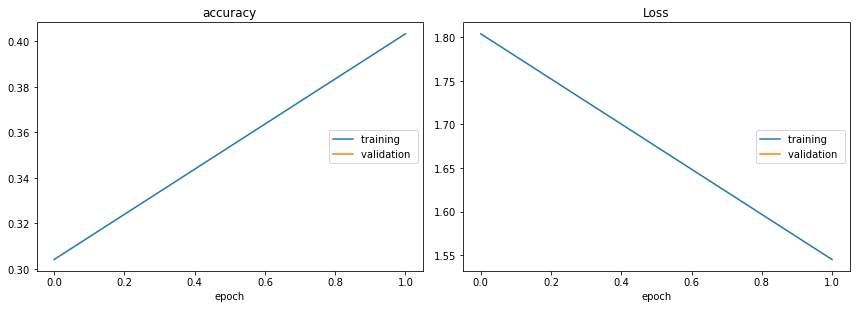

accuracy
	training         	 (min:    0.304, max:    0.403, cur:    0.403)
	validation       	 (min:    0.390, max:    0.390, cur:    0.390)
Loss
	training         	 (min:    1.545, max:    1.804, cur:    1.545)
	validation       	 (min:    1.566, max:    1.566, cur:    1.566)
181/448 [===========>..................] - ETA: 24:58 - loss: 1.5453 - accuracy: 0.4033

KeyboardInterrupt: 

In [28]:
epoch = 15
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weight.h5", 
                             monitor='val_accuracy', 
                             save_weights_only=True,
                             mode='max',
                             verbos=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                             factor=0.1,
                             patience=2,
                             min_lr=0.00001, 
                             mode='auto')

callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]

history = model.fit(x=train_generator,
                   steps_per_epoch=steps_per_epoch,
                   epochs=epoch,
                   validation_data=validation_generator,
                   validation_steps=validation_steps,
                   callbacks=callbacks)

### Task 7: Represent Model as JSON String

In [32]:
model_json = model.to_json()
with open('model.json', "w")as json_file:
    json_file.write(model_json)